<a href="https://colab.research.google.com/github/Isaac0123/CS418Final/blob/main/CS418Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import math
import csv
import datetime
from matplotlib import pyplot as plt

#make sure to click and drag necessary files into the files section of the google colab!
#deforestation by forest in the amazon by KM^2 (https://www.kaggle.com/code/sasakitetsuya/global-cumulative-co2-emission-gap-analysis/input)
forests = pd.read_csv('forests.csv')
forests.columns = forests.iloc[0]
forests = forests[1:]
#reset index for easier concatanation later
forests = forests.reset_index(drop=True)

forests
#emissions of brazil over the years by tons (https://ourworldindata.org/)
emissions = pd.read_csv('CO2 emission by countries.csv',encoding='latin1')
emissionsMain = emissions[['Country','Year','CO2 emission (Tons)']]

emissionsMain = emissionsMain[(emissionsMain.Country =="Brazil")]
emissionsMain = emissionsMain[(emissionsMain.Year > 1987)]
dataframes = [forests,emissionsMain.reset_index()]

final = pd.concat(dataframes,axis = 1)
final = final.drop(columns=['Year'])
final = final.drop(columns=['index'])
final = final.drop(columns=['Country'])
final = final.drop(final.tail(2).index)
final

,Year/States,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL,CO2 emission (Tons)
0,1988,620,1510,60,2450,5140,6990,2340,290,1650,21050,4.219243e+09
1,1989,540,1180,130,1420,5960,5750,1430,630,730,17770,4.431374e+09
2,1990,550,520,250,1100,4020,4890,1670,150,580,13730,4.650032e+09
3,1991,380,980,410,670,2840,3780,1110,420,440,11030,4.879426e+09
4,1992,400,799,36,1135,4674,3787,2265,281,409,13786,5.113027e+09
5,1993,482,370,0,372,6220,4284,2595,240,333,14896,5.357333e+09
6,1994,482,370,0,372,6220,4284,2595,240,333,14896,5.611335e+09
7,1995,1208,2114,9,1745,10391,7845,4730,220,797,29059,5.880013e+09
8,1996,433,1023,0,1061,6543,6135,2432,214,320,18161,6.169324e+09
9,1997,358,589,18,409,5271,4139,1986,184,273,13227,6.476273e+09


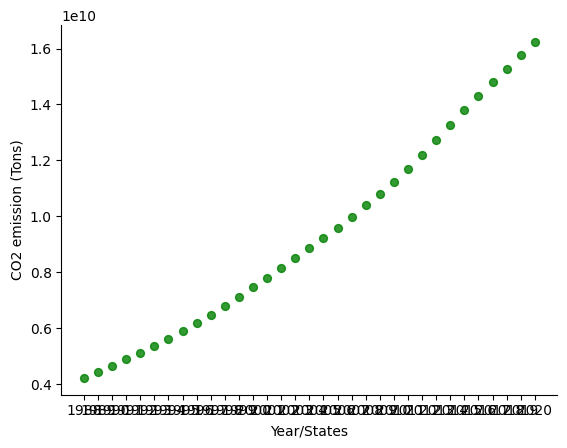

In [95]:
from matplotlib import pyplot as plt
final.plot(kind='scatter', x='Year/States', y='CO2 emission (Tons)', s=32, alpha=.8,color = 'green')
#change xtick interval frequency
plt.gca().spines[['top', 'right',]].set_visible(False)

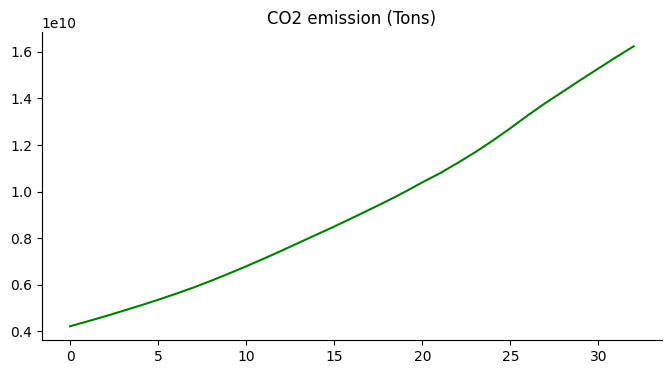

In [ ]:
from matplotlib import pyplot as plt
final['CO2 emission (Tons)'].plot(kind='line', figsize=(8, 4), title='CO2 emission (Tons)',color = 'green')
plt.gca().spines[['top', 'right']].set_visible(False)


**REFLECTION**

a discussion of the following:

What is the hardest part of the project that you’ve encountered so far?

**Answer: The hardest part would probably be finding datasets and making sure that each one has good integrity and usability.**

○ What are your initial insights?

**Answer:The data is usable and can give us some valuable insight as to the affects that deforestation can on have on Brazils carbon footprint. So far from what we have seen, deforestation has a correlation to an increase in carbon emissions**

○ Are there any concrete results you can show at this point? If not, why not?

**Answer:I think that there are results that we can show, we have a visualization that shows the increase of deforestation as well as carbon emissions over time and this can show that the two are correlated**

○ Going forward, what are the current biggest problems you’re facing?

**Answer: I think the biggest problem we are facing is probably using ML methods on our dataset, ML tends to need some hefty datasets which we don't have. This will lead our machine to overtrain on a small amount of data and have a bias.**

○ Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

**Answer: I don't think we're entirely on track with our project we do need to maybe look for a dataset that has more density and would allow us to explore more in terms of ML models.**

○ Given your initial exploration of the data, is it worth proceeding with your project,why? If not, how are you going to change your project and why do you think it’s better than your current results?

**Answer: I don't think we will have to change our project but there are better options in terms of datasets. I think we can continue but if we find a better dataset, we can implement that one instead.**